#Modele języka naturalnego w rozpoznawaniu sentymentu opinii
##Na podstawie danych z serwisu ceneo.pl



Analiza tekstu jest szybko rozwijającą się dziedziną uczenia maszynowego. Budzi nie tylko szczególne zainteresowanie biznesu, dając działom sprzedaży potężne narzędzie marketingowe, ale także badaczy ze względu na niestandardowe podejścia, które należy wdrożyć.
Z oczywistych względów język polski nie jest dominującym w rozważaniach i przykładach na temat analizy tekstu, jednak narzędzia stworzone dla języka angielskiego są względnie uniwersalne, i mogą być stosowane do analizowania języka polskiego jedynie po niewielkich zmianach. Szczególną wagę pełni tu jeden z kroków analizy - tokenizacja - podczas której słowa zamieniane są na poszczególne indeksy tablicy, dzięki czemu algorytmy zaczynają być całkowicie obojętne na język.
W naszej pracy przeprowadzimy analizę sentymentu komentarzy na największej w Polsce porównywarce produktów - ceneo.pl. 

Analiza sentymentu jest techniką przetwarzania języka naturalnego w celu określenia czy zebrane dane mają wydźwięk pozytywny, negatywny, bądź neutralny. Technika ta wykorzystuje dane tekstowe, aby pomóc przedsiębiorcom w monitorowaniu marki i oferowanych produktów poprzez zbieranie i analizowanie opinii klientów oraz określenie ich potrzeb.

W ostatnich latach klienci zaczęli bardziej otwarcie wyrażać poglądy i uczucia względem oferowanych usług i towarów. Dzięki temu analiza sentymentu stała się istotnym narzędziem, które automatycznie pobiera i bada opinie z ankiet, dyskusji na serwisach społecznościowych, czy sklepach internetowych  lub porównywarkach cenowych. Z opinii zwrotnych można dowiedzieć się, czy marka jest popularna, klienci zadowoleni lub sfrustrowani, a także czy oferowane usługi są skrojone na potrzeby rynku.

##Rodzaje Analizy Sentymentu

Analiza sentymentu skupia się na polaryzacji (negatywny, pozytywny, neutralny), ale może być stosowana także do analizy emocji (szczęśliwy, smutny, wściekły, zadowolony itp.), stopnia nagłości (pilny, nienaglący), czy intencji (zainteresowany, niezainteresowany).
W zależności od potrzeb interpretacyjnych można wykorzystać dane z opinii do wielu celów.

###System punktacyjny

Aby rozszerzyć polaryzację sentymentu można określić system uporządkowanych kategorii (bardzo pozytywny -> pozytywny -> neutralny -> negatywny -> bardzo negatywny) i dla każdej z nich przydzielić punktację, bądź liczbę gwiazdek, np. bardzo pozytywny = 5/5 gwiazdek, a bardzo negatywny = 1/5 gwiazdek.

###Wykrywanie emocji

Ten typ sentymentu służy do określenia emocji zawartych w tekście. Pozwala on na wykrycie, czy klient był zadowolony, sfrustrowany, smutny, wściekły, bądź obojętny. Systemy te opierają się na słownikach (listach słów, którym przypisane są poszczególne emocje) i zaawansowanych algorytmach uczenia maszynowego.

Podstawowym problem w budowaniu słowników jest kompleksowa natura ludzka. Ludzie wyrażają emocje na niezliczoną liczbę sposobów. Niektóre słowa wydają się być ściśle powiązane z jednym rodzajem emocji, ale w zależności od kontekstu potrafią wyrażać inne uczucia. 

###Analiza aspektów

Często klienci mają mieszane uczucia na temat danego produktu, mogą być zadowoleni z jednego elementu, lecz mieć negatywne zdanie na temat innej części. W takiej sytuacji przydaje się analiza sentymentu oparta na aspektach, która pozwala określić, które dokładnie elementu produktu są oceniane. Przykładowo w recenzji tekstowej: „Telefon rozładowuje się po zaledwie 3 godzinach użytkowania” klasyfikator będzie w stanie wykryć, że negatywna opinia dotyczy baterii urządzenia.


##Istotność Analizy Sentymentu

Analiza sentymentu jest niezwykle ważna, ponieważ pozwala biznesom na znacznie szybsze zrozumienie ogólnego obrazu opinii jego klientów. Wykorzystując automatyczne sortowanie przez sentyment ukryty w recenzjach, dialogach na mediach społecznościowych, czy innych publicznych miejscach w sieci internetowej można dynamicznie podejmować decyzje i wydatnie zwiększyć ich poprawność.

Znakomita większość danych na świecie jest nieuporządkowana, więc aby wyciągnąć z nich maksimum informacji niezbędna jest organizacja i czyszczenie pozyskanych zbiorów. Codziennie tworzone są masy danych niepoddanych strukturyzacji w postaci: maili, czatów, ankiet, artykułów, dokumentów itp. Jednak ich analiza w surowej formie jest mało efektywna i wielce czasochłonna. Analiza sentymentu  pozwala na rozwiązanie tych problemów.

Innym zastosowaniem analizy sentymentu może być nieustanne monitorowanie sytuacji na rynku, pozwalające na natychmiastowe wykrywanie kryzysów, np. gwałtowny wzrost negatywnych opinii na temat firmy, bądź produktu. Szybkie zidentyfikowanie zaistniałych problemów pozwala na zminimalizowanie strat wizerunków poprzez akcje PR-owe, bądź nowe oferty dla klientów zdecydowanych na zrezygnowanie z usługi.


In [ ]:
#Wczytanie bibliotek niezbednych w analizie
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn import metrics
from wordcloud import WordCloud
from many_stop_words import get_stop_words
from random import sample 
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import plot_roc_curve, roc_curve
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D # do konwolucyjnych
import matplotlib.pyplot as plt

## Eksploracja danych

Ceneo indeksuje swoje produkty inkrementacyjnie, co znacząco ułatwiło pozyskanie danych w automatyczny sposób. Przejrzeliśmy około 100 tysięcy indeksów, co przełożyło się na pozyskanie blisko 500 tysięcy opinii.

In [ ]:
#Upload danych do Google Colab - w przypadku uruchamiania lokalnie komórka do pominięcia
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#import io
#data_all = pd.read_csv(io.BytesIO(uploaded["ceneo_ALL.csv"]), delimiter=";", header=None)
#data_all.columns = ["product_ID","category","sentiment","review","rate"]

In [ ]:
#Wczytanie zbioru danych CSV to ramki danych
data_all = pd.read_csv("ceneo_ALL.csv", delimiter=";", header=None)
data_all.columns = ["product_ID","category","sentiment","review","rate"]

FileNotFoundError: ignored

WordCloud dla losowych 10000 recenzji w zbiorze danych

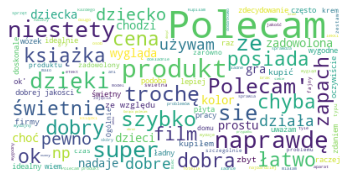

In [ ]:
# Wybór 10000 losowych recenzji ze zbioru
losowe_recenzje = sample(list(data_all['review']), 10000)

# Stop words dla języka polskiego
stop_words = get_stop_words('pl')

# WordCloud
wordcloud = WordCloud(
                    background_color='white',
                    stopwords=stop_words,
                    max_words=120,
                    max_font_size=45,
                    random_state=42 # seed do rozmieszczenia tekstu
).generate(str(losowe_recenzje))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Rozkład kategorii Polecam/Nie polecam jest mocno niesymetryczny w stronę polecania. Jest to ciekawe zjawisko w kontekście agregatorów opinii, gdzie to zazwyczaj opinie negatywne są chętniej wystawiane przez kupujących.

In [ ]:
data_all.sentiment.value_counts()

Polecam        432101
Nie polecam     32080
Brak            24949
Name: sentiment, dtype: int64

Zobaczmy jak rozkładają się oceny produktu w zależności od tego czy klient poleca produkt czy nie.
Warto zauważyć że klienci są w większości zdecydowani co do decyzji, i kiedy polecają produkt dają mu co najmniej 4 gwiazdki, a jeżeli nie wtedy poniżej 3 (z drobnymi wyjątkami).
Nasza analiza skupiać będzie się na przydzieleniu opinii kategorii Polecam/Nie polecam.
Ponieważ oceny z brakiem polecania bądź też nie w pewien sposób pokrywają się z tymi, które zostały przydzielone przy nie polecaniu, łączymy kategorię Brak oraz Nie polecam.

In [ ]:
data_all.groupby(["sentiment", "rate"]).count()

product_ID  category  review
sentiment   rate                               
Brak        3,5/5        4615      4615    4615
            3/5         20334     20334   20334
Nie polecam 0,5/5        3712      3712    3712
            0/5           477       477     477
            1,5/5         562       562     562
            1/5         13717     13717   13717
            2,5/5         983       983     983
            2/5         12545     12545   12545
            3,5/5          65        65      65
            3/5            19        19      19
Polecam     4,5/5       26223     26223   26222
            4/5         92077     92077   92076
            5/5        313801    313801  313800

In [ ]:
rev_txt = data_all["review"].astype(str)
rev_labels = data_all["sentiment"]
rev_labels = rev_labels.eq('Polecam').mul(1)

# Tokenizacja

Ponieważ model działa na zasadzie chińskiego pokoju nie będzie rozumiał słów po polsku. Musimy "zmatematyzować" język naturalny, a jedną z najbardziej popularnych w tego typach analizach metod jest tokenizacja, czyli przypisanie słowom w tekście liczby naturalnej.

Aby nie analizować outlierów definiujemy górną granicę liczby słów, które chcemy zakodować, i układamy w tablicy słowa według ich częstotliwości, aż dochodzimy do górnej granicy, słowa poza nią kodujemy jako jeden numer.

Ponieważ tokenizator, którego używamy pierwsze dwa indeksy rezerwuje na słowa poza granicą słów, oraz "puste" słowa (więcej o tym w dziale "Padding") w dalszej analizie często spotykać będziemy się z num_words + 2

In [ ]:
num_words = 20000 #Tyle najczęstszych słów zostanie wzięte pod uwagę 
oov_token='<UNK>' #Jak kodować słowa spoza 20000 najczęstszych

tk = Tokenizer(oov_token = oov_token, num_words=num_words+1)

tk.fit_on_texts(rev_txt)

### Parowanie słowa do indeksu

In [ ]:
tk.word_index = {e:i for e,i in tk.word_index.items() if i <= num_words} # <= because tokenizer is 1 indexed
tk.word_index[tk.oov_token] = num_words + 1
# print(tk.word_index)

# Stworzenie sekwencji słów zamienionych na indexy
rev_seq = tk.texts_to_sequences(rev_txt)

In [ ]:
list(tk.word_index.items())[0:10]

[('<UNK>', 20001),
 ('i', 2),
 ('w', 3),
 ('nie', 4),
 ('jest', 5),
 ('się', 6),
 ('na', 7),
 ('z', 8),
 ('bardzo', 9),
 ('to', 10)]

In [ ]:
print('Tekst: ', rev_txt[256])
print('Indeksy: ', rev_seq[256])
print('Opinia: ', rev_labels[256])

Tekst:  To bezsprzecznie najzabawniejsza z powieści opowiadających o Detektywie Monku. Historia jest przemyślana, rozbrajająca i wciaga bez reszty. Jedynym minusem tej ksiązki jest jej nieduża objętość, cięzko się oderwać aby nie przeczytać jej za jedym razem. Polecam
Indeksy:  [10, 20001, 20001, 8, 923, 20001, 23, 20001, 20001, 612, 5, 5990, 20001, 2, 20001, 51, 3353, 572, 277, 41, 11045, 5, 62, 12020, 8260, 11758, 6, 1241, 195, 4, 792, 62, 21, 20001, 327, 12]
Opinia:  1


# Sprowadzanie recenzji do tych samych długości

Model LSTM wymaga określonego kształtu danych. Dane te powinny być wprowadzone w postaci macierzy, gdzie każdy wiersz odpowiada jednej recenzji, a każda komórka jednemu słowu. Macierz musi mieć wyspecifikowane wymiary. Oznacza to, że należy sprowadzić każdą recenzję do jednakowej długości (tzw. do jednakowej liczby słów). W tej analizie przyjęliśmy długość pojedynczej recenzji jako 30 słów, ale należałoby wypróbować również inne wartości. Każda recenzja zawierająca powyżej 30 słów została ucięta, natomiast recenzje zawierające poniżej 30 słów zostały uzupełnione przez index 0. 

In [ ]:
max_doc_length = 30 # Liczba maksymalna słów w recenzji, pozostałe słowa zostaną ucięte a braki zapełnione przez liczbę 0
truncating = 'post' # Usuwanie słów na końcu recenzji (żeby było 30 słów)
padding = 'post' # Dodawanie 0 na końcu recenzji (żeby było 30 słów)

encoded_docs = pad_sequences(rev_seq, truncating = truncating, padding = padding, maxlen = max_doc_length)
print(encoded_docs)

[[   59     0     0 ...     0     0     0]
 [   59     0     0 ...     0     0     0]
 [ 4866 20001  2249 ...     6    91   703]
 ...
 [  832     2   541 ...     0     0     0]
 [  630    27  7187 ...    22   470    84]
 [ 2849   398     0 ...     0     0     0]]


# Train Test Split

Podzieliliśmy zbiór danych na dane treningowe (do wytrenowania modelu), dane walidacyjne (do wyboru najlepszej architektury sieci i tuningu hiperparametrów) oraz dane testowe (do ewaluacji ostatecznego modelu) w proporcjach 60:20:20.

In [ ]:
X,y=encoded_docs,rev_labels
# Dzielimy zbiór danych na zbiór treningowy i testowy w proporcji 60:40
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Dzielimy dane testowe na dane walidacyjne i testowe w proporcji 50:50 (po 20% całego zbioru danych)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_dev = np.asarray(y_dev).astype('float32')

print(y_train.shape,y_dev.shape,y_test.shape)

(293478,) (97826,) (97826,)


#LSTM - krótko o metodzie

Sieci LSTM (Long Short Term Memory networks) są specjalną odmianą Rekurencyjnych sieci neuronowych. Kluczową zaletą tego typu sieci jest umiejętność zapamiętywania długoterminowych zależności w danych. Jest to szczególnie istotne w przypadku danych tekstowych, gdzie ważna jest struktura języka i powiązania pomiędzy słowami. Przykładowo w zdaniu: "Mam problem, ale nie wiem, jak go rozwiązać", słowo "rozwiązać" jest powiązane ze słowem "problem". Słowa te występują w znacznej odległości między sobą i zwykła rekurencyjna sieć neuronowa miałaby problem z uwzględnieniem tak odległej zależności. Sieć LSTM pozwala natomiast na wyłapanie takich powiązań i jest w stanie nauczyć się, jakie informacje należy przechowywać w pamięci długoterminowej, a jakie zignorować. Dokonywane jest to za pomocą specjalnych bramek.

# Budowa Modelu

Do budowy modeli w analizie sentymentu wykorzystuje się różne techniki i architektury sieci. Z uwagi na długi czas wymagany do treningu modelu oraz wiele możliwych struktur sieci i wartości ich hiperparametrów, postanowiliśmy nie wykorzystywać walidacji krzyżowej. Przyjęliśmy następującą metodykę. Na początku zbudowaliśmy model jedynie z warstwą Embedding, dwiema warstwami LSTM oraz jedną warstwą Dense. Taki model wytrenowaliśmy na zbiorze treningowym oraz sprawdziliśmy Accuracy na zbiorze danych walidacyjnych. Następnie metodą prób i błędów zmienialiśmy wartości hiperparametrów oraz dodawaliśmy lub usuwaliśmy poszczególne warstwy modelu (również rozpatrując różne kolejności warstw), sprawdzając, czy poszczególne zmiany powodują wzrost accuracy.
Ze względu na wykorzystanie różnych technik, postanowiliśmy podzielić modele na 3 rodzaje: (1) model z warstwami Embedding, LSTM i Dense; (2) model z warstwami Embedding, LSTM, Dense oraz Dropout (w celu zapobiegania przetrenowaniu modelu); (3) model z warstwami Embedding, LSTM, Dense oraz CNN (warstwa konwolucyjna).
Dla każdego rodzaju modelu wybraliśmy takie architektury sieci i wartości hiperparametrów na poszczególnych warstwach, które wspomnianą wcześniej metodyką dawały najlepsze accuracy.
Poniżej prezentujemy wspomniane trzy modele. W dalszej części raportu zamieściliśmy wytrenowanie tych modeli na danych treningowych, a następnie porównanie ich zdolności predykcyjnych na zbiorze testowym.

#### Model 1 – 3 warstwy LSTM


Na początek zdefiniujemy długość wektorów, na który zamieniony będzie wektor ztokenizowanych słów.
Ponieważ ztokenizowane słowa są niezależne od siebie, powiążemy je ze sobą na bazie częstotliwości występowania, co realizujemy warstwą Embedding

In [ ]:
# Długość wektorów z warstwy Embedding, wspólna dla wszystkich modeli
embedding_length = 100

In [ ]:
model_bazowy = Sequential()
model_bazowy.add(Embedding(input_dim = num_words+2, output_dim = embedding_length, input_length = max_doc_length))
model_bazowy.add(LSTM(units = 64, input_shape = (max_doc_length, embedding_length), return_sequences = True, unroll = True, name='LSTM'))
model_bazowy.add(LSTM(units = 64, input_shape = (max_doc_length, embedding_length), return_sequences = True, unroll = True, name='LSTM_2'))
model_bazowy.add(LSTM(units = 64, return_sequences = False, name ='LSTM_3'))
model_bazowy.add(Dense(16, name = "Dense1"))
model_bazowy.add(Dense(units=1, activation = 'sigmoid', name = "Dense2"))

model_bazowy.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model_bazowy.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 30, 100)           2000200   
_________________________________________________________________
LSTM (LSTM)                  (None, 30, 64)            42240     
_________________________________________________________________
LSTM_2 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
LSTM_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
Dense1 (Dense)               (None, 16)                1040      
_________________________________________________________________
Dense2 (Dense)               (None, 1)                 17        
Total params: 2,109,545
Trainable params: 2,109,545
Non-trainable params: 0
___________________________________________

#### Model 2 – 3 warstwy LSTM + dropout

In [ ]:
model_drop = Sequential()
model_drop.add(Embedding(input_dim = num_words+2, output_dim = embedding_length, input_length = max_doc_length))
model_drop.add(LSTM(units = 64, input_shape = (max_doc_length, embedding_length), return_sequences = True, unroll = True, name='LSTM'))
model_drop.add(Dropout(rate = 0.2))
model_drop.add(LSTM(units = 64, input_shape = (max_doc_length, embedding_length), return_sequences = True, unroll = True, name='LSTM_2'))
model_drop.add(Dropout(rate = 0.1))
model_drop.add(LSTM(units = 64, return_sequences = False, name ='LSTM_3'))
model_drop.add(Dropout(rate = 0.2))
model_drop.add(Dense(16, name = "Dense1"))
model_drop.add(Dense(units=1, activation = 'sigmoid', name = "Dense2"))

model_drop.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model_drop.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 30, 100)           2000200   
_________________________________________________________________
LSTM (LSTM)                  (None, 30, 64)            42240     
_________________________________________________________________
dropout_21 (Dropout)         (None, 30, 64)            0         
_________________________________________________________________
LSTM_2 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
dropout_22 (Dropout)         (None, 30, 64)            0         
_________________________________________________________________
LSTM_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)              

#### Model 3 – 3 warstwy LSTM + warstwa CNN


Warstwy konwolucyjne służą do znajdowania wzorów przestrzennych na obrazie poprzez przesuwanie małego okna jądra na obrazie. Okna te są często małe, mogą mieć rozmiar 3x3 piksele, a każda komórka jądra ma przypisaną wagę. Gdy jądro przesuwa się po obrazie, piksel po pikselu, wagi jądra są mnożone przez wartość piksela na obrazku poniżej, a następnie wszystkie pomnożone wartości są sumowane, aby uzyskać wyjściową, przefiltrowaną wartość piksela.

W przypadku klasyfikacji tekstu jądro konwolucyjne nadal będzie przesuwanym oknem, jego zadaniem jest jedynie przyglądanie się sekwencjom wielu słów, a nie małym obszarom pikseli w obrazie. Jądra nie będą już kwadratowe, zamiast tego będą szerokim prostokątem, w naszym modelu o wymiarach embedding_length x 5. 

In [ ]:
model_CNN = Sequential()
model_CNN.add(Embedding(input_dim = num_words+2, output_dim = embedding_length, input_length = max_doc_length))
model_CNN.add(Conv1D(filters = 64, kernel_size=5, padding='same'))
model_CNN.add(MaxPooling1D(pool_size = 5))
model_CNN.add(LSTM(units = 64, input_shape = (max_doc_length, embedding_length), return_sequences = True, unroll = True, name='LSTM'))
model_CNN.add(LSTM(units = 64, input_shape = (max_doc_length, embedding_length), return_sequences = True, unroll = True, name='LSTM_2'))
model_CNN.add(LSTM(units = 64, return_sequences = False, name ='LSTM_3'))
model_CNN.add(Dense(16, name = "Dense1"))
model_CNN.add(Dense(units=1, activation = 'sigmoid', name = "Dense2"))

model_CNN.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model_CNN.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 30, 100)           2000200   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 64)            32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
LSTM (LSTM)                  (None, 6, 64)             33024     
_________________________________________________________________
LSTM_2 (LSTM)                (None, 6, 64)             33024     
_________________________________________________________________
LSTM_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
Dense1 (Dense)               (None, 16)              

# Trening modelu i ewaluacja na danych walidacyjnych

## Przetrenowanie przy większej liczbie epok

Przy wyborze architektury sieci i tuningu hiperparametrów metodą prób i błędów zauważyliśmy, że zwiększenie liczby epok nie skutkowało poprawą accuracy, a nawet czasami ją pogarszało. Na wykresie przedstawiliśmy zależność pomiędzy liczbą epok a accuracy i loss na zbiorze walidacyjnym w przypadku trenowania przykładowego modelu.

In [ ]:
batch_size = 32

np.random.seed(42)

model_test = Sequential()
model_test.add(Embedding(input_dim = num_words+2, output_dim = embedding_length, input_length = max_doc_length))
model_test.add(LSTM(units = 64, input_shape = (max_doc_length, embedding_length), return_sequences = True, unroll = True, name='LSTM'))
model_test.add(Dropout(rate = 0.2))
model_test.add(LSTM(units = 64, input_shape = (max_doc_length, embedding_length), return_sequences = True, unroll = True, name='LSTM_2'))
model_test.add(Dropout(rate = 0.2))
model_test.add(LSTM(units = 64, return_sequences = False, name ='LSTM_3'))
model_test.add(Dropout(rate = 0.2))
model_test.add(Dense(16, name = "Dense1"))
model_test.add(Dense(units=1, activation = 'sigmoid', name = "Dense2"))

model_test.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model_test.summary()

history_test = model_test.fit(x_train, y_train,
          batch_size = batch_size, 
          epochs = 5,
          validation_data = (x_test, y_test))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 30, 100)           2000200   
_________________________________________________________________
LSTM (LSTM)                  (None, 30, 64)            42240     
_________________________________________________________________
dropout_24 (Dropout)         (None, 30, 64)            0         
_________________________________________________________________
LSTM_2 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
dropout_25 (Dropout)         (None, 30, 64)            0         
_________________________________________________________________
LSTM_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)              

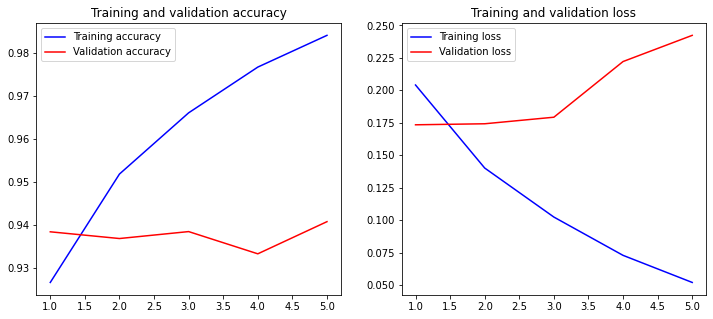

In [ ]:
acc = history_test.history['accuracy']
val_acc = history_test.history['val_accuracy']
loss = history_test.history['loss']
val_loss = history_test.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training accuracy')
plt.plot(x, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

Wykresy pokazują przetrenowanie modelu wraz ze wzrostem liczby trenowanych epok. Sensownym punktem wydaje się liczba epok równa 3 – przy wyższych wartościach model już nie poprawia accuracy na zbiorze walidacyjnym, a strata na tym zbiorze przyjmuje coraz wyższe wartości.
Trenujemy zatem modele z liczbą epok = 3.

In [ ]:
print('Training...')
batch_size = 32

np.random.seed(42)

model_bazowy.fit(x_train, y_train,
          batch_size = batch_size, 
          epochs = 2,
          validation_data = (x_test, y_test))

Training...
Epoch 1/3
9172/9172 [==============================] - 707s 76ms/step - loss: 0.2302 - accuracy: 0.9163 - val_loss: 0.1706 - val_accuracy: 0.9384
Epoch 2/3
9172/9172 [==============================] - 691s 75ms/step - loss: 0.1338 - accuracy: 0.9540 - val_loss: 0.1672 - val_accuracy: 0.9425
Epoch 3/3
9172/9172 [==============================] - 681s 74ms/step - loss: 0.0928 - accuracy: 0.9691 - val_loss: 0.1745 - val_accuracy: 0.9434


In [ ]:
print('Training...')
batch_size = 32

np.random.seed(42)

model_CNN.fit(x_train, y_train,
          batch_size = batch_size, 
          epochs = 2,
          validation_data = (x_test, y_test))

Training...
Epoch 1/3
9172/9172 [==============================] - 419s 45ms/step - loss: 0.2234 - accuracy: 0.9202 - val_loss: 0.1643 - val_accuracy: 0.9418
Epoch 2/3
9172/9172 [==============================] - 421s 46ms/step - loss: 0.1206 - accuracy: 0.9588 - val_loss: 0.1602 - val_accuracy: 0.9442
Epoch 3/3
9172/9172 [==============================] - 419s 46ms/step - loss: 0.0691 - accuracy: 0.9780 - val_loss: 0.1906 - val_accuracy: 0.9404


In [ ]:
print('Training...')
batch_size = 32

np.random.seed(42)

model_drop.fit(x_train, y_train,
          batch_size = batch_size, 
          epochs = 2,
          validation_data = (x_test, y_test))

Training...
Epoch 1/3
9172/9172 [==============================] - 728s 78ms/step - loss: 0.2359 - accuracy: 0.9135 - val_loss: 0.1762 - val_accuracy: 0.9364
Epoch 2/3
9172/9172 [==============================] - 718s 78ms/step - loss: 0.1384 - accuracy: 0.9529 - val_loss: 0.1714 - val_accuracy: 0.9429
Epoch 3/3
9172/9172 [==============================] - 729s 79ms/step - loss: 0.0994 - accuracy: 0.9677 - val_loss: 0.1788 - val_accuracy: 0.9394


# Ewaluacja na danych testowych

Do ewaluacji jakości otrzymanych modeli wykorzystaliśmy miary accuracy oraz krzywe ROC.

In [ ]:
y_predict_bazowy = model_bazowy.predict(x_dev)
fpr_bazowy, tpr_bazowy, thresholds_bazowy = roc_curve(y_dev, y_predict_bazowy)

y_predict_CNN = model_CNN.predict(x_dev)
fpr_CNN, tpr_CNN, thresholds_CNN = roc_curve(y_dev, y_predict_CNN)

y_predict_drop = model_drop.predict(x_dev)
fpr_drop, tpr_drop, thresholds_drop = roc_curve(y_dev, y_predict_drop)

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

#Obliczanie AUC
auc_bazowy = metrics.auc(fpr_bazowy, tpr_bazowy)
auc_cnn = metrics.auc(fpr_CNN, tpr_CNN)
auc_drop = metrics.auc(fpr_drop, tpr_drop)

plt.plot(fpr_bazowy, tpr_bazowy, label='Bazowy (area = {:.3f})'.format(auc_bazowy))
plt.plot(fpr_CNN, tpr_CNN, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.plot(fpr_drop, tpr_drop, label='Dropout (area = {:.3f})'.format(auc_drop))

plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('Krzywa ROC')
plt.legend(loc='best')
plt.show()

#Zbliżenie

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_bazowy, tpr_bazowy, label='Bazowy (area = {:.3f})'.format(auc_bazowy))
plt.plot(fpr_CNN, tpr_CNN, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.plot(fpr_drop, tpr_drop, label='Dropout (area = {:.3f})'.format(auc_drop))

plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('Krzywa ROC (zbliżenie na lewy górny róg)')
plt.legend(loc='best')
plt.show()

NameError: ignored

In [ ]:
score, acc = model_bazowy.evaluate(x_dev, y_dev, batch_size=batch_size)
print(f'Score na zbiorze testowym dla modelu 1 (bazowy) = {score}')
print(f'Accuracy na zbiorze testowym dla modelu 1 (bazowy) = {acc}')

score, acc = model_drop.evaluate(x_dev, y_dev, batch_size=batch_size)
print(f'Score na zbiorze testowym dla modelu 2 (bazowy+dropout) = {score}')
print(f'Accuracy na zbiorze testowym dla modelu 2 (bazowy+dropout) = {acc}')

score, acc = model_CNN.evaluate(x_dev, y_dev, batch_size=batch_size)
print(f'Score na zbiorze testowym dla modelu 3 (bazowy+CNN) = {score}')
print(f'Accuracy na zbiorze testowym dla modelu 3 (bazowy+CNN) = {acc}')

3058/3058 [==============================] - 44s 14ms/step - loss: 0.1759 - accuracy: 0.9434
Score na zbiorze testowym dla modelu 1 (bazowy) = 0.17586380243301392
Accuracy na zbiorze testowym dla modelu 1 (bazowy) = 0.9433892965316772
3058/3058 [==============================] - 47s 15ms/step - loss: 0.1799 - accuracy: 0.9381
Score na zbiorze testowym dla modelu 2 (bazowy+dropout) = 0.17988018691539764
Accuracy na zbiorze testowym dla modelu 2 (bazowy+dropout) = 0.9380532503128052
3058/3058 [==============================] - 19s 6ms/step - loss: 0.1916 - accuracy: 0.9402
Score na zbiorze testowym dla modelu 3 (bazowy+CNN) = 0.19159507751464844
Accuracy na zbiorze testowym dla modelu 3 (bazowy+CNN) = 0.9402101635932922


### Wybór najlepszego modelu

# Predykcja dla nowej recenzji

In [ ]:
review = "beznadziejna sukienka"
print(f'New review = {review}')

words = review.split()
review = []

for word in words:
    word = word.lower()
    if word not in tk.word_index:
        review.append(num_words+1)
    else:
        review.append(tk.word_index[word])

print(f"review = {review}")

review = pad_sequences([review], truncating = 'post', padding = 'post', maxlen = max_doc_length)

prediction = model_drop.predict(review)
print(f'Prediction (0 = Negative, 1 = Positive) = {prediction}')

New review = beznadziejna sukienka
review = [5475, 1685]
Prediction (0 = Negative, 1 = Positive) = [[0.02142051]]


# Dalsze kroki
Zbudowaliśmy kilka modeli klasyfikacji binarnej, jednak ceneo.pl jest ogromną kopalnią względnie łatwych do pozyskania danych. W naszym zbiorze danych posiadaliśmy jeszcze punktową ocenę produktu od 1 do 5 punktów, oraz bardzo szczegółową kategorię produktu. Dodatkowo wszystkie produkty posiadają przypisaną najniższą cenę, za jaką produkt można kupić w jednym z indeksowanych przez ceneo sklepach internetowych.
Te wszystkie informacje składają się na wiele innych typów analiz, którą można na zbiorze danych z ceneo przeprowadzać
